In [1]:
import numpy as np
from Farm_Evaluator_Vec import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from tqdm import tqdm
import copy
import LSHADE
from itertools import combinations

In [2]:
power_curve  =  loadPowerCurve('Shell_Hackathon Dataset/power_curve.csv')
n_wind_instances, cos_dir, sin_dir, wind_sped_stacked, C_t = preProcessing(power_curve)
wind_inst_freq =  binWindResourceData('Shell_Hackathon Dataset/Wind Data/combined_data.csv')
def get_objective_value(coords,constraint_check=False,year=None,verbose=0,n_wind_instances=n_wind_instances, cos_dir=cos_dir, sin_dir=sin_dir, wind_sped_stacked=wind_sped_stacked, C_t=C_t,wind=1,wind_inst_freq=wind_inst_freq,get_each_turb_aep=1):
    turb_specs = {'Name': 'Anon Name','Vendor': 'Anon Vendor','Type': 'Anon Type','Dia (m)': 100,
                  'Rotor Area (m2)': 7853,'Hub Height (m)': 100,'Cut-in Wind Speed (m/s)': 3.5,'Cut-out Wind Speed (m/s)': 25,
                  'Rated Wind Speed (m/s)': 15,'Rated Power (MW)': 3}
    turb_diam  =  turb_specs['Dia (m)']
    turb_rad   =  turb_diam/2 
    
    if wind==0:
        if year == None:
            mean_AEP = 0
            for y in [2007,2008,2009,2013,2014,2015,2017]:
                wind_inst_freq =  binWindResourceData('Shell_Hackathon Dataset/Wind Data/wind_data_'+str(y)+'.csv')
                mean_AEP += getAEP(turb_rad, coords, power_curve, wind_inst_freq, 
                          n_wind_instances, cos_dir, sin_dir, wind_sped_stacked, C_t) 
            mean_AEP /= 7

            if verbose:
                print('Average power produced by the wind farm over 7 years is: ', "%.12f"%(mean_AEP), 'GWh')

            return mean_AEP
        else:
            wind_inst_freq =  binWindResourceData('Shell_Hackathon Dataset/Wind Data/wind_data_'+str(year)+'.csv')
            AEP = getAEP(turb_rad, coords, power_curve, wind_inst_freq, 
                          n_wind_instances, cos_dir, sin_dir, wind_sped_stacked, C_t)

            if verbose:
                print('Total power produced by the wind farm is: ', "%.12f"%(AEP), 'GWh')

            return AEP
        
    else:
        #penalty = checkConstraints(coords,turb_diam)
        
        AEP = getAEP(turb_rad, coords, power_curve, wind_inst_freq, 
              n_wind_instances, cos_dir, sin_dir, wind_sped_stacked, C_t,get_each_turb_aep)
        
        return AEP
    
def plot_turbines(coords):
    plt.figure(figsize=(10,10))
    plt.scatter(coords[:,0],coords[:,1],color='b',s=200)
    plt.show()
    

In [ ]:
##Hexagonal packed coordinates in a recatngular space
def get_hexagonal_packed_coords(left,right,bottom,top,dist=400):
    center = [(left+right)/2,(top+bottom)/2]
    coords = np.array([center])
    i = 0
    while i<len(coords):
        neighbors = get_neighbors(coords[i],dist)
        for neighbor in neighbors:
            if check(coords,neighbor)==0 and neighbor[0]<=right and neighbor[0]>=left and neighbor[1]>=bottom and neighbor[1]<=top:
                coords = np.vstack((coords,np.array(neighbor)))
        i += 1
    return coords
        
def check(array,test):
    return any(np.array_equal(x, test) for x in array)

def get_neighbors(coord,dist):
    Theta = np.linspace(np.pi/6,11*np.pi/6,6)
    neighbors = []
    for t in Theta:
        neighbor = [coord[0]+np.round(np.cos(t)*dist,8),coord[1]+np.round(np.sin(t)*dist,8)]
        neighbors.append(neighbor)
    return neighbors

In [ ]:
coords = get_hexagonal_packed_coords(450,3550,450,3550)

In [ ]:
new_coords = [[2000,2000]]
for coord in coords:
    if not check(new_coords,np.round(coord,0)):
        new_coords.append(np.round(coord,0).tolist())

In [ ]:
len(new_coords)

In [ ]:
edge_points = []
X = np.linspace(50,3950,10)
Y = np.linspace(50,3950,10)
for x in X:
    edge_points.append([x,50])
    edge_points.append([x,3950])
    if x!=50 and x!=3950:
        edge_points.append([50,x])
        edge_points.append([3950,x])

In [ ]:
coords = np.vstack((np.array(edge_points),np.array(new_coords)))

In [ ]:
coords.shape

In [ ]:
plot_turbines(coords)

In [ ]:
# Symmetric positioning of the turbines
X=np.linspace(50,3950,9)
coords = []
for x in X:
    for y in X:
        coords.append([x,y])
coords = np.array(coords)
c = []
for i in range(100):
    if (i//10)%2==0:
        if i%2==0:
            c.append(i)
    elif (i//10)%2==1:
        if i%2==1:
            c.append(i)
'''co = []
for i in c:
    co.append(coords[i])
co = np.array(co)

get_objective_value(co,get_each_turb_aep=0)'''

In [ ]:
opt_sol = pd.read_csv('submission11.csv').values

In [ ]:
#Monte Carlo Simulation
best_score = 500
fixed_coords = []
X = np.linspace(50,3950,10)
for x in X:
    fixed_coords.append([x,50])
    fixed_coords.append([x,3950])
    if x!=50 and x!=3950:
        fixed_coords.append([50,x])
        fixed_coords.append([3950,x])
fixed_coords = np.array(fixed_coords)
for i in tqdm(range(100000)):
    ind = np.random.choice(list(range(64)),size=14,replace=False).tolist()
    co = np.vstack((coords[ind],fixed_coords))
    score = get_objective_value(co,get_each_turb_aep=0)
    if score>best_score:
        best_score = score
        print('{:.5f}'.format(best_score))
        best_coords = co

In [ ]:
plot_turbines(best_coords)

In [ ]:
plot_turbines(coords)

In [ ]:
sub = pd.DataFrame(best_coords,columns=['x','y'])
sub.to_csv('submission5.csv',index=False)

In [8]:
list(enumerate(np.array([[1,2],[3,4]])))

[(0, array([1, 2])), (1, array([3, 4]))]

In [13]:
len(list(combinations(list(range(50)),2)))

1225

In [34]:
class LSHADE:
    
    def __init__(self,Np_ini,d,coords,turb,NFE_max,Np_min,penalty=False,gamma=0,is_fixed_coords=0,fixed_coords=None):
        self.Np_ini = Np_ini
        self.NFE_max = NFE_max
        self.Np_min = Np_min
        self.Np = Np_ini #population size
        self.d = d #total number of possible wind turbine locations in the discrete scenario(100)
        self.turb = turb #Number of turbines to be placed(50)
        self.Obj_vals = [] #Stores the objective values obtained in each generation
        self.F = [] #Stores scaling factors
        self.CR = [] #Stores crossover rates
        self.best_score = 0 #Maximum AEP found until any given instance(generation)
        self.X_all = [] #Stores all the decision vectors corresponding to all generations
        self.coords = coords #Coordinates of 100 discrete locations
        self.mu_f = 0.5 #Scaling factor mean used to generate scaling factor f
        self.mu_cr = 0.5 #Crossover Rate mean used to generate CRs
        self.mutate_vec = [] #Stores all the mutation vectors (v's)
        self.trial_vec = [] #Stores all the trial vectors(u's)
        self.NFE = 0
        self.is_fixed_coords = is_fixed_coords
        if is_fixed_coords:
            self.fixed_coords = fixed_coords
        self.penalty = penalty
        if penalty:
            self.gamma = gamma
            self.combs = list(combinations(list(range(self.turb)),2))
        
        
    
    def initialize(self):
        """
        Np = population size
        d = Dimension of decision vector; Number of discrete location
        turb = Number of turbines to be placed; 50 out of 100 dimensional vector will have 1's
        The function randomly initializes values between 0 and 1. This is the 0th generation population.
        """
        random_values = np.random.random((self.Np,self.d))
        columns = np.argsort(random_values,axis=-1)[:,-self.turb:].flatten()
        rows = np.repeat(list(range(self.Np)),repeats=self.turb)
        X = np.zeros((self.Np,self.d))
        X[rows,columns] = 1
        self.X_all.append(X)
        scores = []
        for x in X:
            scores.append(self.get_objective(x))
        self.Obj_vals.append(np.array(scores))
    
    def get_coords(self,x):
        """
        x is an array of length d with values between 0 and 1.
        The location of turbines is decided by sorting x and replacing the last 50 values with 1 and remaining as 0. 
        returns 50 coordinates out of 100 possible ones based on x.
        """
        locs = np.argsort(x)[-self.turb:]
        co = self.coords[locs.tolist()]
        if self.is_fixed_coords:
            co = np.vstack((co,self.fixed_coords))
        return co
    
    def get_objective(self,x):
        """
        x is an array of length d with values between 0 and 1.
        returns objective value corresponding to x
        """
        co = self.get_coords(x)
        P = get_objective_value(co,get_each_turb_aep=0)
        return P - self.get_penalty(co)
    
    def get_penalty(self,co):
        pen = 0
        if self.penalty:
            for c in self.combs:
                turb1 = co[c[0]]
                turb2 = co[c[1]]
                prox = np.linalg.norm(turb1 - turb2) - 400
                if prox<0:
                    pen -= prox
            return self.gamma*pen
        else:
            return 0
    
    def update_best_score(self,t):
        """
        Evaluates all the decision vectors corresponding to a given generation and stores in Obj_vals.
        t is used to identify t-th generation.
        Also finds the best objective function value till the current generation.
        """
        score = max(self.Obj_vals[t])
        max_ind = np.argmax(self.Obj_vals[t])
        if score>self.best_score:
            self.best_score = score
            self.best_x = self.X_all[t][max_ind]
            self.best_coords = self.get_coords(self.X_all[t][max_ind])
    
    def get_p_best(self,t,p=0.05):
        """
        p is the percentile of the best population individuals.
        x_pbest is chosen randomly from Np*p best individuals.
        returns x_pbest
        """
        P = int(self.Np*p)
        inds = np.argsort(self.Obj_vals[t])[-P:]
        p_best = np.random.choice(inds,1)[0]
        return self.X_all[t][p_best] 
    
    def get_f(self):
        """
        Scaling factors for a generation are drawn from cauchy distribution with mean 0.5 and variance 0.1
        """
        F = stats.cauchy.rvs(loc=self.mu_f,scale=np.sqrt(0.1),size=self.Np)
        return F
    
    def get_cr(self):
        """
        Crossover rates are drawn from normal distribution with mean 0.5 and variance 0.1
        """
        CR = np.random.normal(loc=self.mu_cr,scale=np.sqrt(0.1),size=self.Np)
        return CR
    
    def parameter_adaptation(self,t,p=0.05):
        if t>=1: 
            P = int(self.Np*p)    
            inds = np.argsort(self.Obj_vals[t])[-P:].tolist()
            self.mu_f = (self.mu_f + np.mean(self.F[t-1][inds]))/2
            self.mu_cr = (self.mu_cr + np.mean(self.CR[t-1][inds]))/2
    
    def mutation(self,t):
        """
        generates mutant vector v using scaling factor, x_pbest and current generation samples (X)
        """
        x_pbest = np.array(self.get_p_best(t))
        X = self.X_all[t]
        F = self.get_f()
        r1 = np.random.choice(list(range(self.Np)),size=self.Np).tolist()
        r2 = np.random.choice(list(range(self.Np)),size=self.Np).tolist()
        X_r1, X_r2 = X[r1], X[r2]
        V = np.zeros((self.Np,self.d))
        for i in range(self.Np):
            V[i] = X[i] + F[i] * (x_pbest - X[i]) + F[i] * (X_r1[i]-X_r2[i])
        V[V>1] = (X[V>1]+1)/2 #If v goes above 1 or below 0 bring it back within the range.
        V[V<0] = X[V<0]/2
        self.mutate_vec.append(V)
        self.F.append(F.flatten())
        
    def crossover(self,t):
        """
        generates trial vectors u using cross over rates and mutant vectors.
        """
        U = np.zeros((self.Np,self.d))
        V = self.mutate_vec[t]
        X = self.X_all[t]
        K = np.random.choice(list(range(self.Np)),size=1)[0]
        CR = self.get_cr()
        self.CR.append(CR)
        random_values = np.random.random((self.Np,self.d))
        for i in range(self.Np):
            for j in range(self.d):
                if j==K or random_values[i,j] <= CR[i]:
                    U[i,j] = V[i,j]
                else:
                    U[i,j] = X[i,j]
        self.trial_vec.append(U)
    
    def drop_rows(self,X,final_length,t):
        X_1 = X[np.argsort(self.Obj_vals[t+1])[-final_length:].tolist()]
        self.Obj_vals[t+1] = self.Obj_vals[t+1][np.argsort(self.Obj_vals[t+1])[-final_length:].tolist()]
        return X_1
    
    def selection(self,t):
        """
        The next generation (t+1) vectors are selected based on objective function values for x and u.
        """
        X_1 = np.zeros((self.Np,self.d))
        X = self.X_all[t]
        U = self.trial_vec[t]
        scores = np.zeros(self.Np)
        for i in range(self.Np):
            f_x = self.Obj_vals[t][i]
            f_u = self.get_objective(U[i])
            if f_x>=f_u:
                X_1[i] = X[i]
                scores[i] = f_x
            else:
                X_1[i] = U[i]
                scores[i] = f_u
        self.Obj_vals.append(scores)
        columns = np.argsort(X_1,axis=-1)[:,-self.turb:].flatten()
        rows = np.repeat(list(range(self.Np)),repeats=self.turb)
        X_1[rows,columns] = 1
        self.NFE += self.Np
        self.population_size_reduction()
        X_1 = self.drop_rows(X_1,self.Np,t)
        self.X_all.append(X_1)
        
        
    def population_size_reduction(self):
        self.Np = (self.Np_min-self.Np_ini)/self.NFE_max * self.NFE + self.Np_ini
        self.Np = int(self.Np)
    
    def run(self,run_from_middle=0,starting_x=None):
        if run_from_middle:
            self.X_all.append(starting_x)
            scores = []
            for x in X_ini:
                scores.append(self.get_objective(x))
            self.Obj_vals.append(np.array(scores))
        else:
            self.initialize()
        t = 0
        while self.NFE <= self.NFE_max:
            self.update_best_score(t)
            print('{:.4f}'.format(self.best_score))
            self.mutation(t)
            self.crossover(t)
            self.selection(t)
            t += 1
            #self.parameter_adaptation(t)

In [38]:
fixed_coords = []
X = np.linspace(50,3950,9)
for x in X:
    fixed_coords.append([x,50])
    fixed_coords.append([x,3950])
    if x!=50 and x!=3950:
        fixed_coords.append([50,x])
        fixed_coords.append([3950,x])
fixed_coords = np.array(fixed_coords)
X=np.linspace(50+400,3950-400,8)
coords = []
for x in X:
    for y in X:
        coords.append([x,y])
coords = np.array(coords)
d = len(coords)
turb = 18
n_max = 50000
Np = 300
f_coords = 1
np_min = 4
ls = LSHADE(Np,d,coords,turb,n_max,np_min,penalty=False,gamma=0,is_fixed_coords=1,fixed_coords=fixed_coords)
ls.run()

520.8709
521.0514
521.3208
521.9138
521.9138
521.9138
521.9138
521.9138
522.2147
522.2147
522.2147
522.2147
522.2147
522.2147
522.2147
522.2816
522.2816
522.2816
522.2816
522.2816
522.2816
522.3582
522.3629
522.3887
522.4766
522.4766
522.4766
522.6194
522.6194
522.6194
522.6194
522.6194
522.6194
522.6194
522.6194
522.7264
522.9563
522.9563
522.9563
522.9563
522.9563
523.0623
523.0623
523.0623
523.0623
523.0623
523.1259
523.1259
523.1259
523.1259
523.1259
523.1259
523.1259
523.2046
523.2046
523.2046
523.2046
523.2046
523.2046
523.2046
523.2735
523.2735
523.2735
523.2735
523.2735
523.2735
523.2735
523.3503
523.3503
523.3503
523.3503
523.3789
523.3789
523.3789
523.3789
523.3789
523.3789
523.3789
523.4208
523.4208
523.4208
523.4208
523.4208
523.4208
523.4208
523.4208
523.4208
523.4208
523.4208
523.4208
523.4208
523.4208
523.4208
523.4208
523.4208
523.4208
523.4208
523.4208
523.4208
523.4208
523.4208
523.4208
523.4208
523.4208
523.4208
523.4208
523.4208
523.4208
523.4208
523.4208
523.4208
5

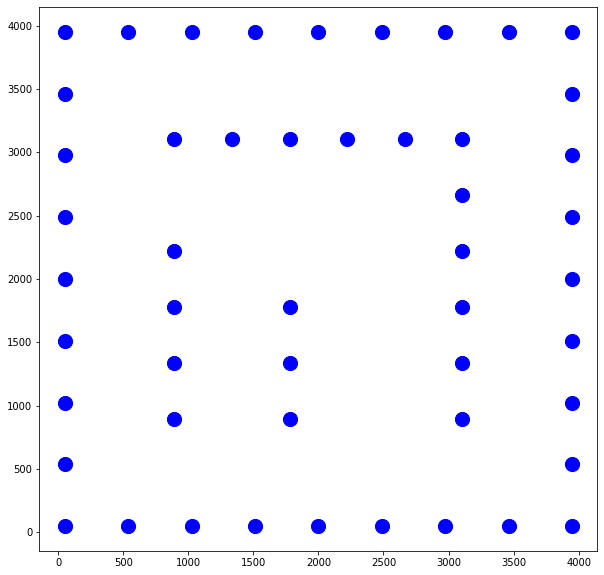

In [39]:
plot_turbines(ls.best_coords)

514.0407
515.4659
516.6305
516.8418
518.0578
518.0578
518.0578
518.0578
518.0578
518.0578
518.0578
518.0578
518.0578
518.0578
518.3529
519.3104
519.3104
519.3609
519.3609
519.7762
519.7762
519.7762
519.8337
519.8337
519.9264
520.5529
520.5529
520.5529
520.7667
520.7667
520.8570
520.8655
521.4346
521.4346
521.4346
521.4346
521.4346
521.4346
521.6304
521.8881
521.8881
521.9930
521.9930
521.9930
521.9930
521.9930
521.9930
522.3333
522.3537
522.3537
522.3537
522.3537
522.8872
522.8872
522.8872
522.8872
522.8872
522.8872
522.8872
522.8872
522.8872
522.8872
522.8872
522.8872
522.8872
522.8905
522.9455
522.9455
522.9677
522.9677
522.9677
522.9704
523.0480
523.0480
523.0480
523.0480
523.0857
523.1667
523.1896
523.2941
523.2941
523.2941
523.2941
523.2942
523.2942
523.3220
523.3220
523.3220
523.3220
523.3220
523.3220
523.3220
523.3220
523.3220
523.3220
523.3220
523.3220
523.3220
523.3220
523.3220
523.3312
523.3312
523.3312
523.3312
523.3312
523.3312
523.3312
523.3312
523.3312
523.3312
523.3312
5

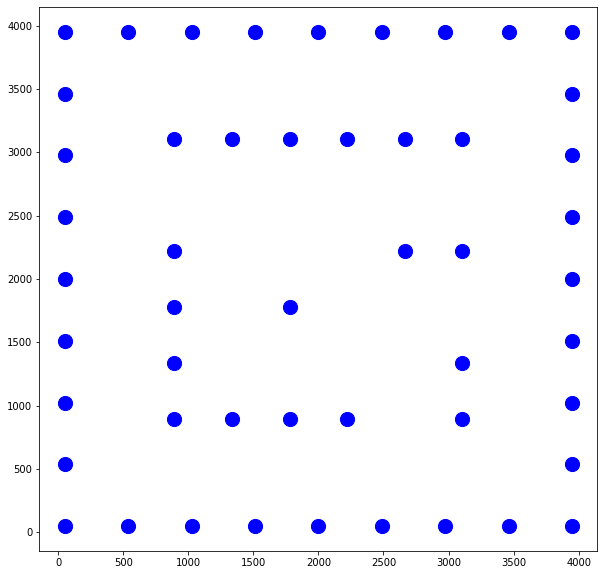

513.8162
514.4014
515.1352
515.5742
515.5742
516.0310
516.0310
516.1934
516.1934
516.1934
516.4077
516.4077
516.4077
516.4077
516.9584
516.9584
516.9584
516.9584
517.1438
517.1438
517.1501
517.3666
517.3902
517.9446
517.9446
517.9446
518.0368
518.1928
518.1928
518.1970
518.2167
518.2167
518.2167
518.3516
518.4961
518.4961
518.7311
518.7840
518.8203
518.9746
518.9746
518.9746
519.1260
519.1260
519.1260
519.1863
519.3200
519.4087
519.4087
519.4087
519.4087
519.4101
519.4590
519.4940
519.8304
519.8304
519.8304
519.8304
519.8304
519.8554
519.8554
519.8554
519.8735
519.8735
519.8735
519.8735
519.9965
519.9965
520.0146
520.0146
520.1309
520.1309
520.1309
520.1309
520.1968
520.1968
520.1968
520.1968
520.1968
520.1968
520.1968
520.1968
520.1968
520.2561
520.2561
520.2561
520.2561
520.2802
520.2802
520.2802
520.3106
520.3106
520.3106
520.3106
520.3106
520.3106
520.4111
520.4111
520.4111
520.4111
520.4111
520.4111
520.4111
520.4111
520.4111
520.4111
520.4111
520.4111
520.4111
520.4111
520.4111
5

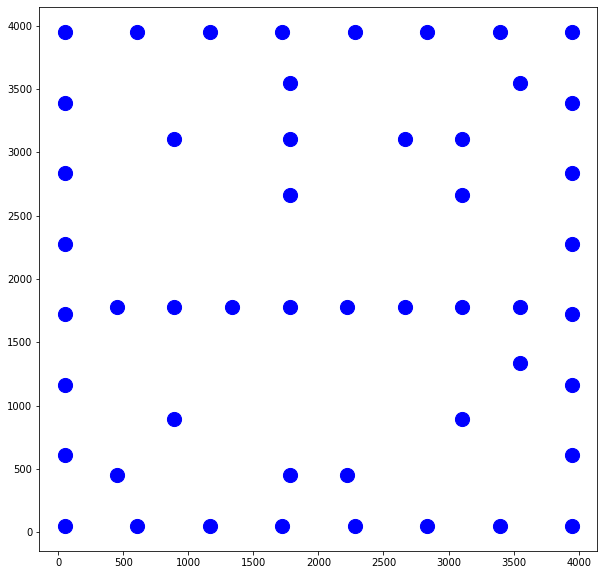

513.0356
513.1628
513.6582
513.7625
514.1883
514.1883
514.3982
514.6419
514.6419
514.7468
514.8337
514.9285
515.0624
515.5203
515.5203
515.5791
515.5791
515.5791
516.0634
516.0634
516.0634
516.0634
516.3545
516.3545
516.3545
516.3546
516.4169
516.4169
516.5339
516.5339
516.5339
516.5545
516.8527
517.1244
517.1244
517.1244
517.1244
517.1244
517.1244
517.1244
517.1244
517.1244
517.2937
517.2937
517.2937
517.2937
517.2937
517.3381
517.3381
517.3381
517.3381
517.3381
517.3381
517.3381
517.3660
517.3898
517.4228
517.4228
517.4228
517.4736
517.4736
517.4736
517.4736
517.4736
517.4736
517.4736
517.4736
517.5682
517.5682
517.5682
517.5682
517.5682
517.5682
517.5682
517.5682
517.5682
517.5847
517.5847
517.5847
517.5847
517.6623
517.6678
517.6678
517.6678
517.6678
517.7848
517.7848
517.7848
517.7848
517.8837
517.8837
517.8837
517.8837
517.8837
517.8837
517.8837
517.8837
517.8837
517.8837
517.8837
517.8837
517.8837
517.8837
517.8837
517.8837
517.8837
517.8837
517.8837
517.8837
517.8837
517.8837
5

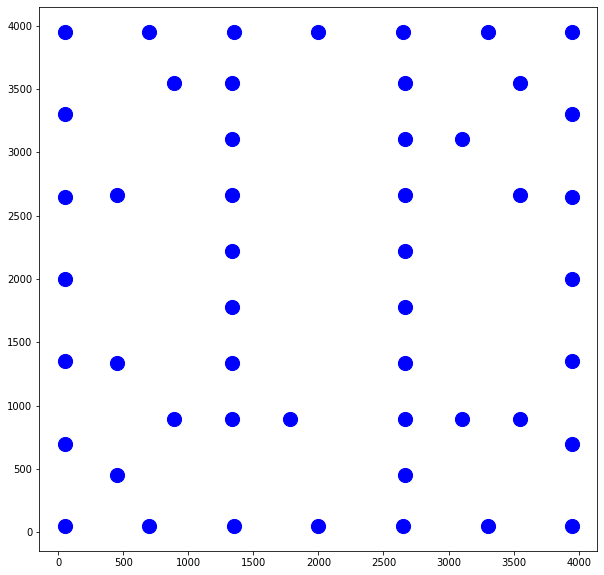

In [102]:
def vary_boundary_coords(h=10):
    X = np.linspace(50,3950,h)
    b_coords = []
    for x in X:
        b_coords.append([x,50])
        b_coords.append([x,3950])
        if x!=50 and x!=3950:
            b_coords.append([50,x])
            b_coords.append([3950,x])
    coords = []
    X = np.linspace(50+400,3950-400,8)
    for x in X:
        for y in X:
            coords.append([x,y])
    return np.vstack((np.array(b_coords),np.array(coords)))
LS = {}
for h in [9,8,7]:
    coords = vary_boundary_coords(h)
    d = len(coords)
    turb = 50
    n_max = 50000
    Np = 300
    f_coords = 0
    np_min = 4
    LS[h] = LSHADE(Np,d,coords,turb,n_max,np_min,penalty=False,gamma=0)
    LS[h].run()
    plot_turbines(LS[h].best_coords)

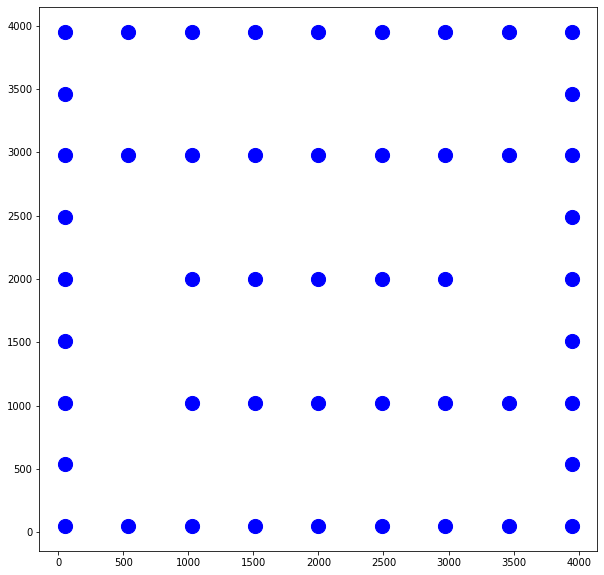

In [105]:
plot_turbines(ls1.best_coords)

In [42]:
coords = pd.read_csv('submission55.csv').values
coords

array([[3950. , 2975. ],
       [2487.5, 3950. ],
       [2975. , 1025. ],
       [3950. ,   50. ],
       [2487.5, 2975. ],
       [2975. ,   50. ],
       [3950. , 2487.5],
       [3950. , 2000. ],
       [2975. , 2975. ],
       [3462.5, 3950. ],
       [2975. , 3950. ],
       [3462.5,   50. ],
       [3950. , 1512.5],
       [3950. , 1025. ],
       [3950. ,  537.5],
       [3462.5, 1025. ],
       [3462.5, 2975. ],
       [2975. , 2000. ],
       [  50. ,   50. ],
       [2000. , 2000. ],
       [2487.5, 1025. ],
       [  50. ,  537.5],
       [  50. , 1025. ],
       [  50. , 1512.5],
       [  50. , 2000. ],
       [  50. , 2487.5],
       [  50. , 2975. ],
       [  50. , 3462.5],
       [  50. , 3950. ],
       [ 537.5,   50. ],
       [ 537.5, 2975. ],
       [ 537.5, 3950. ],
       [1025. ,   50. ],
       [1025. , 1025. ],
       [1025. , 2000. ],
       [1025. , 2975. ],
       [1025. , 3950. ],
       [1512.5,   50. ],
       [1512.5, 1025. ],
       [1512.5, 2000. ],


In [45]:
def move_horizontal_turbines(coords,step=10,line_number=1):
    temp_coords = coords.copy()
    if line_number==1:
        hor_ind = []
        for i in range(50):
            coord = coords[i]
            if coord[1]==2975 and coord[0]!=50 and coord[0]!=3950:
                hor_ind.append(i)
        for j in range(len(hor_ind)):
            temp_coords[hor_ind[j]][1] += step
    elif line_number==2:
        hor_ind = []
        for i in range(50):
            coord = coords[i]
            if coord[1]==2000 and coord[0]!=50 and coord[0]!=3950:
                hor_ind.append(i)
        for j in range(len(hor_ind)):
            temp_coords[hor_ind[j]][1] += step
    elif line_number==3:
        hor_ind = []
        for i in range(50):
            coord = coords[i]
            if coord[1]==1025 and coord[0]!=50 and coord[0]!=3950:
                hor_ind.append(i)
        for j in range(len(hor_ind)):
            temp_coords[hor_ind[j]][1] += step
    return temp_coords
for k in [1,2,3]:
    for step in np.arange(-560,560,10):
        co = move_horizontal_turbines(coords,step,k)
        score = get_objective_value(co,get_each_turb_aep=0)
        print('{:.5f}'.format(score))

524.37521
524.61792
524.80796
523.70778
522.52653
522.45208
522.97328
523.15610
523.21237
523.06577
523.07690
524.71058
525.38436
525.38279
525.35579
525.48561
525.58456
525.09344
524.73611
524.54964
524.62186
524.58326
524.41210
524.46517
524.69815
523.62965
524.27549
523.31055
523.64175
523.46968
523.52495
523.33358
524.51115
524.13564
524.39693
524.59780
524.49872
525.34272
525.15385
525.39038
525.14049
525.18450
525.25133
525.34510
525.27465
525.46814
525.43870
525.90864
524.56789
524.49972
524.99984
526.39495
526.14082
525.24064
525.08732
525.39973
526.67575
525.42623
525.13086
525.25878
525.86977
526.00040
524.81628
524.78603
524.82603
525.67261
525.28465
525.33668
525.01591
525.13708
525.08030
525.09457
525.09728
525.34453
525.20037
525.42035
525.11111
525.07208
524.82761
524.58169
524.77574
523.19720
523.31837
523.28429
523.50076
523.02033
524.34376
523.68154
525.44775
525.22366
525.19198
525.35526
525.40465
525.29908
525.51913
525.94139
526.15001
526.28732
526.09895
526.22372


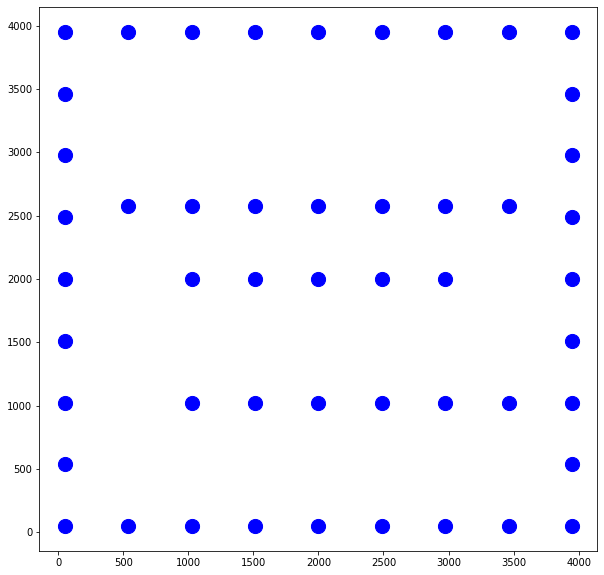

In [47]:
plot_turbines(move_horizontal_turbines(coords,-400,1))

In [106]:
save_coords(ls1.best_coords)

In [104]:
get_objective_value(ls1.best_coords,get_each_turb_aep=0)

526.675751953125

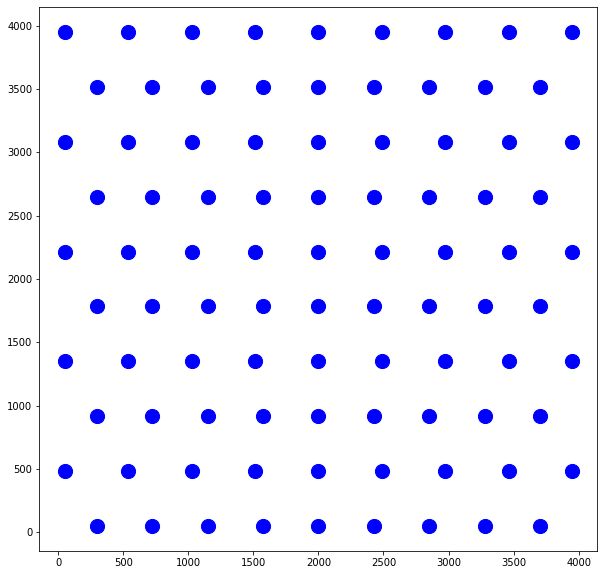

In [88]:
X = np.linspace(50,3950,9)
X_ = np.linspace(50+3950/16,3950-3950/16,9)
Y = np.linspace(50,3950,10)
coords = []
for i in range(10):
    if i%2==1:
        for x in X:
            coords.append([x,Y[i]])
    else:
        for x in X_:
            coords.append([x,Y[i]])
coords = np.array(coords)
plot_turbines(coords)

In [85]:
X=np.linspace(50,3950,9)
coords = []
for x in X:
    for y in X:
        coords.append([x,y])
coords = np.array(coords)
fixed_coords = []
X = np.linspace(50,3950,9)
X_ = np.linspace(50+3950/16,3950-3950/16,9)
Y = np.linspace(50,3950,10)
coords = []
for i in range(11):
    if i%2==0:
        for x in X:
            coords.append([x,Y[i]])
    else:
        for x in X_:
            coords.append([x,Y[i]])
coords = np.array(coords)
for x in X:
    fixed_coords.append([x,50])
    fixed_coords.append([x,3950])
    if x!=50 and x!=3950:
        fixed_coords.append([50,x])
        fixed_coords.append([3950,x])
fixed_coords = np.array(fixed_coords)
#coords = np.vstack((coords,fixed_coords))
d = len(coords)
turb = 50
n_max = 100000
Np = 300
f_coords = 0
np_min = 4
ls_ = LSHADE(Np,d,coords,turb,n_max,np_min,penalty=False,gamma=0)
ls_.run()

514.4836
514.5314
514.5314
515.1534
515.6936
515.8550
516.3403
517.0773
517.5619
517.5619
517.5619
517.5619
517.5619
517.6475
517.6475
518.1564
518.1564
518.7043
518.7043
518.7043
518.8855
518.8855
518.8855
519.3316
519.5523
520.3770
520.3770
520.6926
520.6926
520.6926
520.9359
520.9359
520.9359
521.0986
521.1119
521.1855
521.2800
521.3988
521.3988
522.0672
522.0672
522.0672
522.1252
522.1252
522.1252
522.1252
522.1252
522.2904
522.2904
522.2904
522.2904
522.2904
522.2904
522.3564
522.9279
522.9279
522.9279
522.9279
522.9279
522.9279
522.9279
522.9279
522.9279
522.9279
522.9415
522.9415
522.9456
522.9456
522.9456
522.9456
522.9456
522.9456
523.0395
523.1530
523.1530
523.1530
523.2184
523.2375
523.5781
523.5781
523.5781
523.5782
523.5782
523.5782
523.6152
523.6152
523.6152
523.6152
523.6152
523.6152
523.6152
523.6152
523.6152
523.6152
523.6152
523.6152
523.6152
523.6152
523.6152
523.6152
523.6152
523.6383
523.6383
523.7084
523.7084
523.7084
523.7084
523.7208
523.9372
523.9372
523.9372
5

524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
524.0757
5

In [56]:
X_ini = ls1.X_all[-1]

In [50]:
X_ini = ls1.X_all[-1]
c = X_ini.shape[0]
i = 2
while c<1000:
    X_ini = np.vstack((X_ini,ls1.X_all[-i]))
    c += ls1.X_all[-i].shape[0]
    i += 1

In [55]:
ls1.X_all[-3].shape

(471, 400)

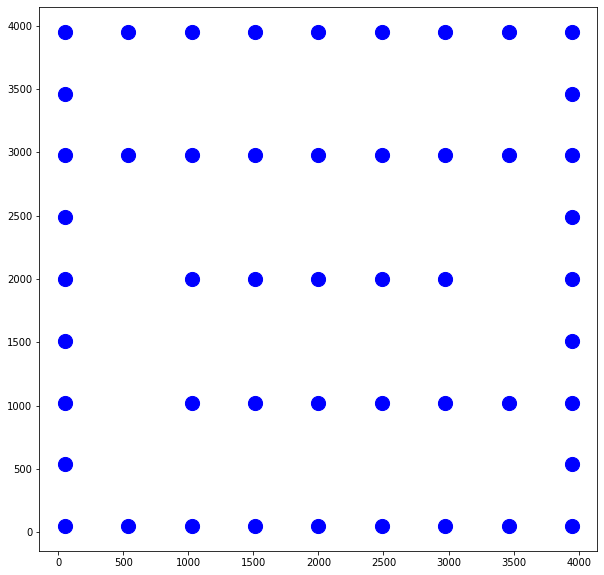

In [62]:
plot_turbines(ls1.best_coords)

In [ ]:
plot_turbines(coords)

In [ ]:
fixed_coords = []
X = np.linspace(50,3950,10)
for x in X:
    fixed_coords.append([x,50])
    fixed_coords.append([x,3950])
    if x!=50 and x!=3950:
        fixed_coords.append([50,x])
        fixed_coords.append([3950,x])
fixed_coords = np.array(fixed_coords)
X=np.linspace(50+400,3950-400,6)
coords = []
for x in X:
    for y in X:
        coords.append([x,y])
coords = np.array(coords)

In [ ]:
X=np.linspace(50,3950,10)
coords = []
for x in X:
    for y in X:
        coords.append([x,y])
coords = np.array(coords)
c = pd.read_csv('submission11.csv').values
aeps = get_objective_value(c,get_each_turb_aep=1)
aep_ind = np.argsort(aeps)
k = 5
fixed_coords = c[aep_ind[k:]]
rows = list(range(100))
for i in range(100):
    for f in fixed_coords:
        if np.round(coords[i,0]) == np.round(f[0]) and np.round(coords[i,1]) == np.round(f[1]):
            rows.remove(i)
            break
coords = coords[rows]
best_score = 525
for i in tqdm(range(100000)):
    ind = np.random.choice(list(range(len(rows))),size=k,replace=False).tolist()
    co = np.vstack((coords[ind],fixed_coords))
    score = get_objective_value(co,get_each_turb_aep=0)
    if score>best_score:
        best_score = score
        print('{:.5f}'.format(best_score))
        best_coords = co
        plot_turbines(best_coords)

In [ ]:
ls.run()

In [ ]:
plot_turbines(ls.best_coords)

In [ ]:
def load_coords(k):
    coords = pd.read_csv('submission'+str(k)+'.csv').values
    if coords.shape[1]==3:
        return coords[:,1:]
    return coords

In [16]:
def save_coords(coords,k=None):
    import os
    max_k = 0
    if k:
        sub = pd.DataFrame(coords,columns=['x','y'])
        sub.to_csv('submission'+str(k)+'.csv',index=False)
    else:
        for file in os.listdir():
            if file[:10]=='submission':
                k = float(file[10:12])
                max_k = max(k,max_k)
        sub = pd.DataFrame(coords,columns=['x','y'])
        sub.to_csv('submission'+str(int(max_k)+1)+'.csv',index=False)

In [ ]:
save_coords(ls.best_coords)

In [ ]:
best_X = ls.X_all[-1]
#X_ = np.random.random((100,100))
#best_X = np.vstack((best_X,X_))

In [ ]:
opt_sol = ls.best_coords.copy()

In [ ]:
opt_sol = pd.read_csv('submission10.csv',index_col=False).values

In [ ]:
def populate_the_edge():
    coord = [50,50]
    coords = []
    for delta in range(0,3700,400):
        coords.append([coord[0]+delta,coord[1]])
    coord = coords[-1]
    y = np.sqrt(400**2 - (3950-coord[0])**2)
    coord = [3950,y]
    for delta in range(0,3700,400):
        coords.append([coord[0],coord[1]+delta])
    coord = coords[-1]
    x = np.sqrt(400**2 - (3950-coord[1])**2)
    coord = [3950-x,3950]
    for delta in range(0,3600,400):
        coords.append([coord[0]-delta,coord[1]])
    coord = coords[-1]
    y = np.sqrt(400**2 - (coord[0])**2)
    coord = [50,3950-y]
    for delta in range(0,3600,400):
        coords.append([coord[0],coord[1]-delta])
    return np.array(coords)

In [ ]:
plot_turbines(opt_sol)

In [ ]:
co = populate_the_edge()
for c in opt_sol:
    if c[0]!=50 and c[1]!=3950 and c[0]!=3950 and c[1]!=50:
        co = np.vstack((co,c))

# 8x8 grid
X=np.linspace(50+433.33,3950-433.33,8)
Y=np.linspace(50+433.33,3950-433.33,8)
grid = []
for x in X:
    for y in Y:
        grid.append([x,y])
grid = np.array(grid)

from itertools import combinations
X = list(combinations(range(52),50))
for x in X:
    c = co[list(x)]
    print(get_objective_value(c))

In [ ]:
sub = pd.DataFrame(rs.opt_sol,columns=['x','y'])
sub.to_csv('submission13.csv',index=False)

In [72]:
def move_turbine(best_coords,index,coords=coords):
    temp_best_coords = best_coords.copy()
    best_score = get_objective_value(best_coords,get_each_turb_aep=0)
    for i in range(81):
        f = 1
        for k in range(50):
            if coords[i][0]==best_coords[k][0] and coords[i][1] == best_coords[k][1]:
                f = 0
        if f:
            temp_best_coords[index] = coords[i]
            score = get_objective_value(temp_best_coords,get_each_turb_aep=0)
            if score>best_score:
                best_coords[index] = coords[i]
                best_score = score
                print('{:.4f}'.format(best_score))
    return best_coords

In [73]:
best_coords = ls1.best_coords.copy()
for j in tqdm(range(50)):
    best_coords = move_turbine(best_coords,j,coords)

100%|██████████| 50/50 [01:35<00:00,  1.91s/it]


In [ ]:
sub = pd.DataFrame(best_coords,columns=['x','y'])
sub.to_csv('submission11.csv',index=False)

In [ ]:
plot_turbines(ls.best_coords)

In [4]:
class RandomSearch:
    
    def __init__(self,opt_sol,iters,delta,theta_size):
        self.opt_sol = opt_sol
        self.max_iters = iters
        self.delta = delta
        self.best_score = self.get_objective(self.opt_sol)
        self.theta_size = theta_size
        print('------------------------------------------------------------------')
        print(f'Step size = {delta}')
        print('Best score before the beginning of random search = {:.4f}'.format(self.best_score))
        print(f'Maximum number of runs before terminating = {self.max_iters}')
        print(f'Number of directions moved in every run = {self.theta_size}')
        print('------------------------------------------------------------------')
        
    def is_edge_point(self,turb):
        """
        checks if a turbine location is on the edge. This could be used to constrain the angle.
        returns 0 -> bottom edge, 1 -> top edge, 2 -> left edge, 3 -> right edge, 4 -> left bottom corner and so on
        """
        coord = self.opt_sol[turb]
        if coord[0]-self.delta<50 and coord[1]-self.delta<50:
            return 5
        if coord[0]+self.delta>3950 and coord[1]-self.delta<50:
            return 6
        if coord[0]-self.delta<50 and coord[1]+self.delta>3950:
            return 7
        if coord[0]+self.delta>3950 and coord[1]+self.delta>3950:
            return 8
        if coord[0]-self.delta<50:
            return 3
        if coord[0]+self.delta>3950:
            return 4
        if coord[1]-self.delta<50:
            return 1
        if coord[1]+self.delta>3950:
            return 2
        else:
            return 0
        
    def get_angle_space(self,turb):
        edge = self.is_edge_point(turb)
        if edge==0:
            return np.linspace(0,2*np.pi,self.theta_size,endpoint=False)
        if edge==1:
            return np.linspace(0,np.pi,self.theta_size)
        if edge==2:
            return np.linspace(np.pi,2*np.pi,self.theta_size)
        if edge==3:
            return np.linspace(-np.pi/2,np.pi/2,self.theta_size)
        if edge==4:
            return np.linspace(np.pi/2,3*np.pi/2,self.theta_size)
        if edge==5:
            return np.linspace(0,np.pi/2,self.theta_size)
        if edge==6:
            return np.linspace(np.pi/2,np.pi,self.theta_size)
        if edge==7:
            return np.linspace(-np.pi/2,0,self.theta_size)
        if edge==8:
            return np.linspace(np.pi,3*np.pi/2,self.theta_size)
            
        
    def check_constraints(self,sol):
        if checkConstraints(sol,100)==0:
            return 1
        else:
            return 0
    
    def make_move(self,coord,angle):
        """
        returns a coordinate by making a move in the given direction.
        """
        new_x = coord[0] + self.delta*np.cos(angle)
        new_y = coord[1] + self.delta*np.sin(angle)
        return np.array([new_x,new_y])
    
    def get_objective(self,sol):
        return get_objective_value(sol,get_each_turb_aep=0)
    
    def refine_solution(self,turb):
        Theta = self.get_angle_space(turb)
        coord = self.opt_sol[turb]
        f = 0
        for theta in Theta:
            new_coord = self.make_move(coord,theta)
            temp_sol = self.opt_sol.copy()
            temp_sol[turb] = new_coord
            if self.check_constraints(temp_sol):
                score = self.get_objective(temp_sol)
                if score>self.best_score:
                    self.best_score = score
                    self.opt_sol = temp_sol
                    f = 1
        return f
    
    def run(self):
        for turb in range(50):
            print('The current turbine index =',turb)
            f = 1
            i = 1
            while f and i<=self.max_iters:   
                f = self.refine_solution(turb)
                #print('The best score after {:.0f} iterations = {:.4f}'.format(i,self.best_score))
                i+=1
            #print(f'Turbine index changed after {i-1} runs')
            print('The current best score = {:.4f}'.format(self.best_score))
            print('------------------------------------------------------------------')
            
            
            

In [5]:
opt_sol = pd.read_csv('submission11.csv').values

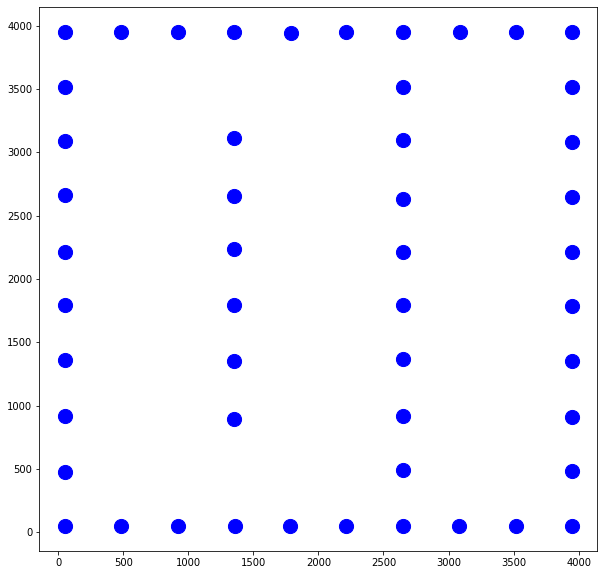

In [9]:
plot_turbines(opt_sol)

In [18]:
opt_sol = pd.read_csv('submission56.csv').values
get_objective_value(opt_sol,get_each_turb_aep=0)

529.9317462158203

In [19]:
%%time
#opt_sol = ls1.best_coords.copy()
steps = [1000,500,100,50,40,30,20,10,5,3,1]
#opt_sol = pd.read_csv('submission30.csv').values
prev_score = get_objective_value(opt_sol,get_each_turb_aep=0)
for step in steps:
    while True:
        rs = RandomSearch(opt_sol,10,step,100)
        rs.run()
        current_score = rs.best_score
        opt_sol = rs.opt_sol
        if current_score==prev_score:
            break
        else:
            prev_score = current_score

------------------------------------------------------------------
Step size = 1000
Best score before the beginning of random search = 529.9317
Maximum number of runs before terminating = 10
Number of directions moved in every run = 100
------------------------------------------------------------------
The current turbine index = 0
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 1
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 2
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 3
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 4
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 5
The current

The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 9
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 10
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 11
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 12
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 13
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 14
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 15
The current best score = 529.9317
-------------------------------------------

The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 19
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 20
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 21
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 22
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 23
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 24
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 25
The current best score = 529.9317
------------------------------------------

The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 29
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 30
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 31
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 32
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 33
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 34
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 35
The current best score = 529.9317
------------------------------------------

The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 39
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 40
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 41
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 42
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 43
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 44
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 45
The current best score = 529.9317
------------------------------------------

The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 49
The current best score = 529.9317
------------------------------------------------------------------
------------------------------------------------------------------
Step size = 20
Best score before the beginning of random search = 529.9317
Maximum number of runs before terminating = 10
Number of directions moved in every run = 100
------------------------------------------------------------------
The current turbine index = 0
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 1
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 2
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 3
The current best score = 529.9317
--------

The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 7
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 8
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 9
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 10
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 11
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 12
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 13
The current best score = 529.9317
---------------------------------------------

The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 17
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 18
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 19
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 20
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 21
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 22
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 23
The current best score = 529.9317
------------------------------------------

The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 27
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 28
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 29
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 30
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 31
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 32
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 33
The current best score = 529.9317
------------------------------------------

The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 37
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 38
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 39
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 40
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 41
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 42
The current best score = 529.9317
------------------------------------------------------------------
The current turbine index = 43
The current best score = 529.9317
------------------------------------------

In [ ]:
sub = pd.read_csv('submission22.csv').values[:,1:]
sub = pd.DataFrame(sub,columns=['x','y'])
sub.to_csv('submission22.csv',index=False)


In [33]:
fixed_coords = []
X = np.linspace(50,3950,10)
for x in X:
    fixed_coords.append([x,50])
    fixed_coords.append([x,3950])
    if x!=50 and x!=3950:
        fixed_coords.append([50,x])
        fixed_coords.append([3950,x])
fixed_coords = np.array(fixed_coords)
inner_coords = []
for i in range(50):
    coord = coords[i]
    if coord[0]!=50 and coord[1]!=50 and coord[0]!=3950 and coord[1]!=3950:
        inner_coords.append(i)
from itertools import combinations
combs = list(combinations(inner_coords,4))
coords_ = np.vstack((fixed_coords,coords[inner_coords]))
for comb in combs:
    temp_coords = coords_.copy()
    for i in range(4):
        temp_coords = np.delete(temp_coords,comb[i],axis=0)
    score = get_objective_value(temp_coords,get_each_turb_aep=0)
    print(score)

524.4098959350586
524.5226440429688
524.3113165283203
524.3063374328614
524.4002719116211
524.5447993469238
524.6513319396972
524.8508299255371
524.6713151550293
524.7191679382324
524.755892944336
524.8033113098145
524.7046984863281
524.7245480346679
524.6128024291992
524.6121675109863
524.4310153198243
524.3843655395508
524.4685423278809
524.6445817565918
524.7251829528809
524.9308296203614
524.7341720581055
524.785901184082
524.8576803588867
524.8955749511719
524.8334866333008
524.8793344116211
524.7310977172851
524.4409066772461
524.3938558959961
524.5082080078125
524.6503962707519
524.7325012207032
524.9686573791504
524.7818243408203
524.8274047851562
524.8747563171387
524.7864358520508
524.8280062866211
524.8624589538574
524.7226432800293
524.5188345336915
524.5865034484864
524.726653289795
524.9102783203125
524.9138204956055
524.8417405700684
524.9224085998535
524.9603366088867
525.0686402893066
524.937746887207
525.0157415771484
524.8901280212402
524.4919340515137
524.6602542114

524.353120880127
524.4697787475586
524.6507304382325
524.4926358032227
524.5355763244629
524.5816246032715
524.6416744995117
524.49216796875
524.5533540344238
524.4095951843261
524.7000869750976
524.798064880371
524.6377981567383
524.716093597412
524.7362104797363
524.8481565856933
524.6458850097656
524.7496105957031
524.6089260864258
524.1597381591797
524.0695463562012
524.1288945007324
524.1653187561035
524.2577828979493
524.065903930664
524.1582678222657
524.0221948242188
524.8566778564453
524.8793678283691
524.9798519897461
525.0287741088868
524.8689418029785
524.9716983032226
524.8192510986328
525.0021075439453
525.036827545166
525.163744354248
524.9516482543945
525.0726502990723
524.9162265014648
525.2216221618652
525.3378456115722
525.1404528808594
525.249992980957
525.092433013916
525.0394340515137
524.8854162597656
524.9485739135743
524.8598858642578
524.9173626708985
524.9720658874512
524.8370288085938
524.7660516357422
524.6730862426758
524.6851496887207
524.7474719238281
52

524.1370147705078
524.1986352539062
524.254775390625
524.1277917480469
524.2067889404296
524.0831135559082
524.8120999145508
524.8304122924804
524.9561260986328
524.9649481201172
524.8736535644531
524.96267578125
524.8230606079102
524.997529449463
525.057512512207
525.1480050659179
525.0007708740235
525.1080386352539
524.9644468688965
525.2227249145508
525.3024572753907
525.1699932861328
525.2657991027831
525.1210711669922
524.9918151855469
524.9026258850098
524.9583984375
524.8762266540527
524.9638119506836
525.0008042907715
524.8785992431641
524.8587831115723
524.7700616455078
524.8011392211914
524.3256857299805
524.4805389404297
524.5566622924805
524.7778477478028
524.5825602722168
524.6159770202637
524.6922674560547
524.6237631225586
524.6359936523437
524.7187001037597
524.5479739379883
524.4227279663086
524.4860527038575
524.74025390625
524.5643481445312
524.5968292236328
524.6437463378907
524.5431953430176
524.5601376342773
524.6230947875977
524.4728530883789
524.7442973327637
52

524.1826620483398
523.9937905883789
524.7536206054688
524.7464360046387
524.8801029968262
524.9167611694336
524.7830941772461
524.947705078125
524.7458010864258
524.8953744506836
524.9632438659668
525.0733186340332
524.8927011108399
525.073151550293
524.864296875
525.1322323608398
525.2344876098633
525.0678717041015
525.2376622009277
525.0276379394531
524.9102114868164
524.7869036865235
524.9152239990234
524.7691593933106
524.8559092712402
524.966953125
524.779418334961
524.8127014160157
524.6712817382812
524.732434387207
524.2422106933594
524.4037472534179
524.4837469482422
524.6866534423829
524.5099456787109
524.5095446777344
524.6020756530762
524.5531869506835
524.5312321472168
524.6763610839844
524.451533203125
524.3398878479004
524.4070220947266
524.6429777526855
524.4856517028809
524.4926358032227
524.5474726867676
524.4665373229981
524.4492942810059
524.5745736694336
524.370330505371
524.6746234130859
524.8292092895508
524.6698114013672
524.7120835876465
524.740989074707
524.711

524.6950410461426
524.5393524169922
524.6102961730957
524.6537379455566
524.7361436462402
524.5226440429688
524.6920335388184
524.5165287780761
524.7484744262696
524.8164440917968
524.6586502075195
524.7648486328125
524.7823924255371
524.9196350097657
524.650463104248
524.8623252868653
524.6898614501953
524.2063879394532
524.1172988891601
524.2059869384766
524.2383009338379
524.3575653076172
524.0987860107422
524.2997543334961
524.131467590332
524.8969116210938
524.9475379943848
525.045415649414
525.1197344970703
524.8929016113282
525.103828125
524.9196350097657
525.0370614624023
525.072416381836
525.2246630859376
524.9457000732422
525.1748387145996
524.9866690063477
525.2702769470214
525.4118302917481
525.1475706481933
525.3652473449707
525.1759414672852
525.1307954406739
524.9098104858399
525.086050415039
524.9607376098633
524.9392172241211
525.1019567871094
524.9352072143555
524.9770783996582
524.8524005126953
524.7486749267578
524.7703958129882
524.8622918701171
524.6569125366211
5

524.3726362609864
524.5135546875
524.3970639038085
524.4056854248047
524.5344067382813
524.3764791870117
524.3734716796876
524.257582397461
524.2456860351563
525.5393820190429
525.6090893554688
525.4128327941894
525.6063157653808
525.4099589538574
525.2846461486816
525.1328672790528
525.2837438964843
525.1513133239746
525.2315135192871
525.3701596069336
525.1963256835937
525.1976623535156
525.0700103759766
525.0655325317383
525.6102589416504
525.4226239013672
525.5780786132813
525.4524984741211
525.4851132202149
525.6283039855957
525.4613873291015
525.4806353759766
525.3580961608886
525.3418222045898
525.4523648071289
525.5989974975586
525.4200173950195
525.4535678100586
525.3166593933106
525.3230419921875
525.1584979248047
525.0873536682129
525.0876210021972
525.2170774841309
524.3184008789062
524.3813580322266
524.5858016967774
524.4234965515137
524.4562449645996
524.5390850830078
524.5658853149414
524.4548080444335
524.5566288757324
524.3601718139648
524.6347572326661
524.7561936950

525.0835775756836
524.9136868286133
524.9544552612305
524.8266696166992
524.7822587585449
524.3087768554688
524.3421267700195
524.4664036560058
524.4727862548829
524.3281251525879
524.4732875061035
524.2959782409667
524.4383670043945
524.493571472168
524.5825268554687
524.3855685424804
524.5489764404297
524.3676905822754
524.6696109008789
524.7478060913086
524.5656179809571
524.7175973510742
524.5351753234863
524.4623268127441
524.3234133911133
524.4339559936524
524.3154602050781
524.3746746826172
524.4717169189453
524.311784362793
524.3091110229492
524.1923529052734
524.1577999877929
524.46085647583
524.505701751709
524.6307138061524
524.3996369934082
524.5773138427735
524.3925860595704
524.6617913818359
524.7732696533203
524.5597700500489
524.7260183715821
524.5400875854492
524.5695611572265
524.4037138366699
524.528525390625
524.40662109375
524.4458523559571
524.5571969604492
524.393822479248
524.4010739135742
524.279771118164
524.2359617614746
525.5457312011719
525.6151043701171
52

In [32]:
len(inner_coords)

18

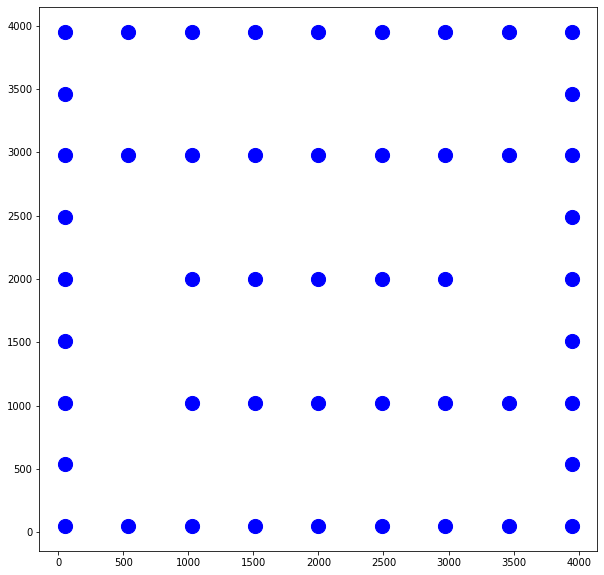

In [30]:
plot_turbines(coords)

In [ ]:
combinations(20,10)

In [17]:
save_coords(opt_sol)

In [24]:
coords = pd.read_csv('submission55.csv').values

In [21]:
get_objective_value(opt_sol1,get_each_turb_aep=0)

526.675751953125

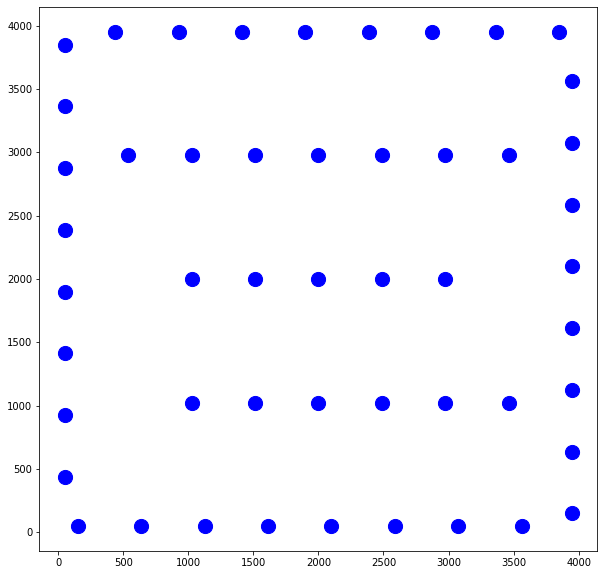

522.9902


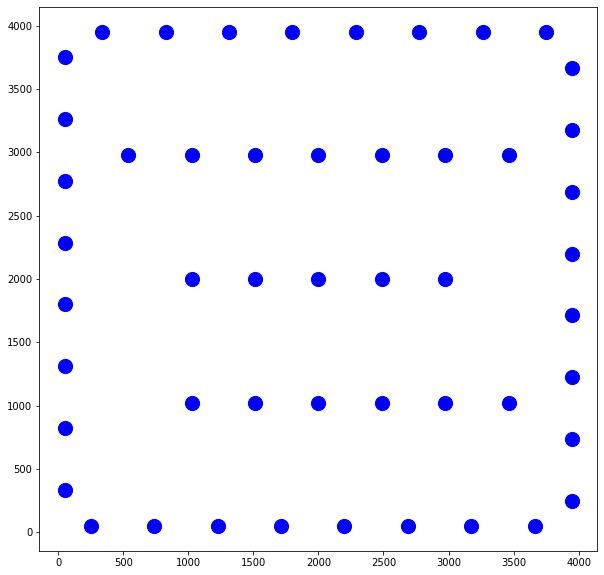

521.2262


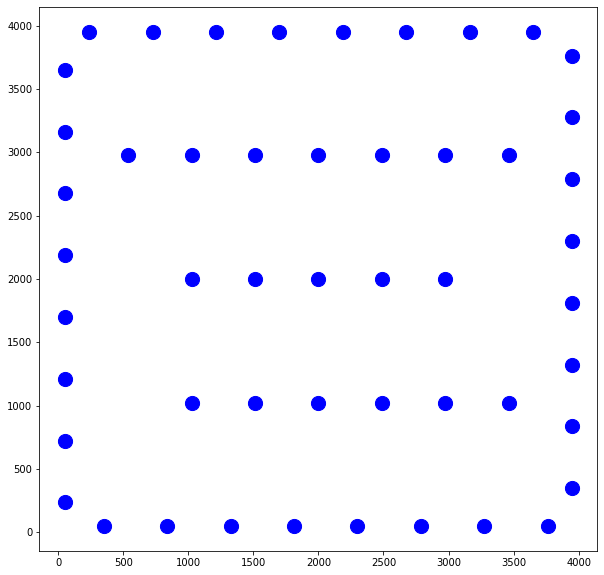

523.4050


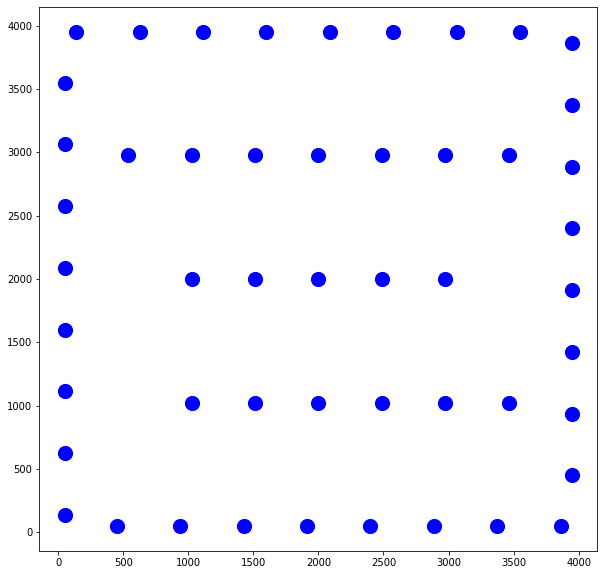

522.7906


In [27]:
def move_boundary_coords(coord,step=1):
    new_coord = coord.copy()
    if coord[1]==50 and coord[0]!=3950:
        new_coord[0] += step
    elif coord[1]==3950 and coord[0]!=50:
        new_coord[0] -= step
    elif coord[0]==50 and coord[1]!=50:
        new_coord[1] -= step
    elif coord[0]==3950 and coord[1]!=3950:
        new_coord[1] += step
    return new_coord
best_score = get_objective_value(coords,get_each_turb_aep=0)
for step in np.arange(100,487.5,100):
    temp_coords = coords.copy()
    for i in range(50):
        temp_coords[i] = move_boundary_coords(coords[i],step)
    score = get_objective_value(temp_coords,get_each_turb_aep=0)
    plot_turbines(temp_coords)
    if score>best_score:
        best_score = score
        opt_step = step
    print('{:.4f}'.format(score))

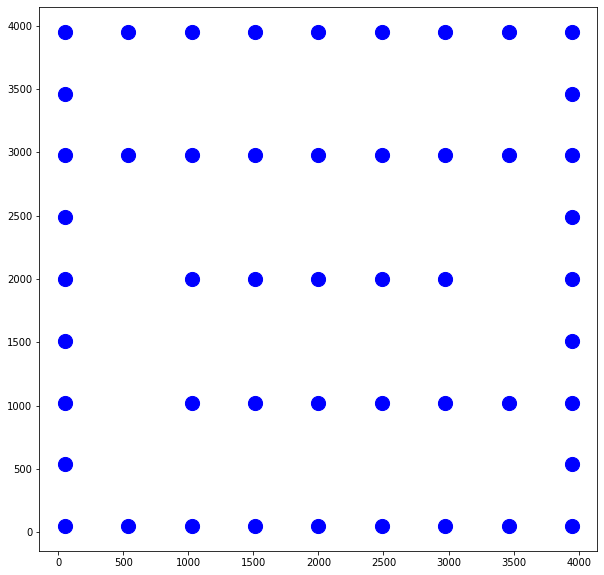

In [23]:
plot_turbines(opt_sol1)

In [ ]:
sub = pd.DataFrame(opt_sol,columns=['x','y'])
sub.to_csv('submission21.csv',index=False)

In [ ]:
def combinations(n,r):
    return fact(n)/(fact(n-r)*fact(r))
def fact(k):
    if k==0:
        return 1
    else:
        return fact(k-1)*k

In [ ]:
combinations(55,5)

In [ ]:
sub = pd.DataFrame(opt_sol,columns=['x','y'])
sub.to_csv('submission20.csv',index=False)

In [ ]:
get_objective_value(opt_sol)

In [ ]:
checkConstraints(opt_sol,100)

In [ ]:
plot_turbines(opt_sol)

In [ ]:
np.arange()

In [ ]:
## Framewise Coords
frame_coords = []
l = 3900
o = 50
while l>=400:
    n = l//400 + 1 
    X = np.linspace(o,l+o,n)
    for x in X:
        frame_coords.append([x,o])
        frame_coords.append([x,o+l])
        if x!=o and x!=l+o:
            frame_coords.append([o,x])
            frame_coords.append([o+l,x])
    l = l-800
    o = o+400

In [ ]:
len(frame_coords)

In [ ]:
frame_coords.append([2000,2000])

In [ ]:
plot_turbines(np.array(frame_coords))

In [ ]:
##Exhaustive Search
coords = pd.read_csv('submission20.csv').values
X = np.linspace(50,3950,100,endpoint=True)
fine_coords = []
for x in X:
    for y in X:
        fine_coords.append([x,y])
def move_turbine(coords,fine_coords,turb=0):
    print('The current turbine index =',turb+1)
    temp_coords = coords.copy()
    best_score = get_objective_value(temp_coords,get_each_turb_aep=0)
    for c in fine_coords:
        temp_coords[turb] = c
        if checkConstraints(temp_coords,100)==0:
            score = get_objective_value(temp_coords,get_each_turb_aep=0)
            if score>best_score:
                coords = temp_coords
                best_score = score
    print('The current best score = {:.4f}'.format(best_score))
    return coords

def find_worst_performing_turbine(coords,worst_index):
    aeps = get_objective_value(coords,get_each_turb_aep=1)
    aep_ind = np.argsort(aeps)
    return aep_ind[worst_index-1]
prev_ts = []
for i in [2,3,4,5,6,7]:
    t = find_worst_performing_turbine(coords,worst_index=i)
    print(t)
    coords = move_turbine(coords,fine_coords,t)

In [ ]:
combinations(52,2)

In [ ]:
c = pd.read_csv('submission20.csv').values
aeps = get_objective_value(c,get_each_turb_aep=1)

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=c[:,0],y=c[:,1],hue=aeps,s=200) 
plt.show()

In [ ]:
np.sum(aeps)

In [93]:
import pyswarms

In [ ]:
pyswarms.general_optimizer.